<a href="https://colab.research.google.com/github/sophie-myk/AIFFEL_quest_cr/blob/main/DLthon/dlthon_jelllyfish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install kaggle

In [4]:
# 캐글 API 키로 로그인
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [5]:
# 데이터셋을 다운로드해서 캐시에 저장
kagglehub.dataset_download('anshtanwar/jellyfish-types')

100%|██████████| 25.5M/25.5M [00:00<00:00, 167MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/anshtanwar/jellyfish-types/versions/16'

In [6]:
from google.colab import drive
import os

# 구글 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# 원본 데이터셋 경로와 구글 드라이브 경로
source_path = "/root/.cache/kagglehub/datasets/anshtanwar/jellyfish-types/versions/16"
target_path = "/content/drive/MyDrive/ColabNotebooks/ToyDatasets/jellyfish-dataset"

# 절대 경로 설정
data_path = os.path.join(source_path, "Train_Test_Valid")
!mkdir -p "{target_path}"

# 필요한 폴더만 복사
if os.path.exists(data_path):
    !cp -r "{data_path}" "{target_path}/"
    print(f"Train_Test_Valid 폴더만 복사 완료")
else:
    print(f"{data_path} 폴더가 원본에 존재하지 않습니다.")

# 경로 내 파일 확인
files = os.listdir(data_path)
!ls -la {target_path}
print(files)

Train_Test_Valid 폴더만 복사 완료
total 4
drwx------ 6 root root 4096 Apr  1 02:12 Train_Test_Valid
['test', 'Train', 'valid']


In [ ]:

import os
import shutil

# 원본 폴더 경로
train_path = "/content/drive/MyDrive/ColabNotebooks/ToyDatasets/jellyfish-dataset/Train_Test_Valid/Train"

# 대상 폴더 경로
all_images_path = "/content/drive/MyDrive/ColabNotebooks/ToyDatasets/jellyfish-dataset/Train_Test_Valid/all_images"

# 대상 폴더 생성
os.makedirs(all_images_path, exist_ok=True)

# 하위 폴더들을 순회하며 이미지 복사
for subdir in os.listdir(train_path):
    subdir_path = os.path.join(train_path, subdir)
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                source_path = os.path.join(subdir_path, filename)
                target_path = os.path.join(all_images_path, filename)
                shutil.copy(source_path, target_path)

print("이미지 합치기 완료")

이미지 합치기 완료


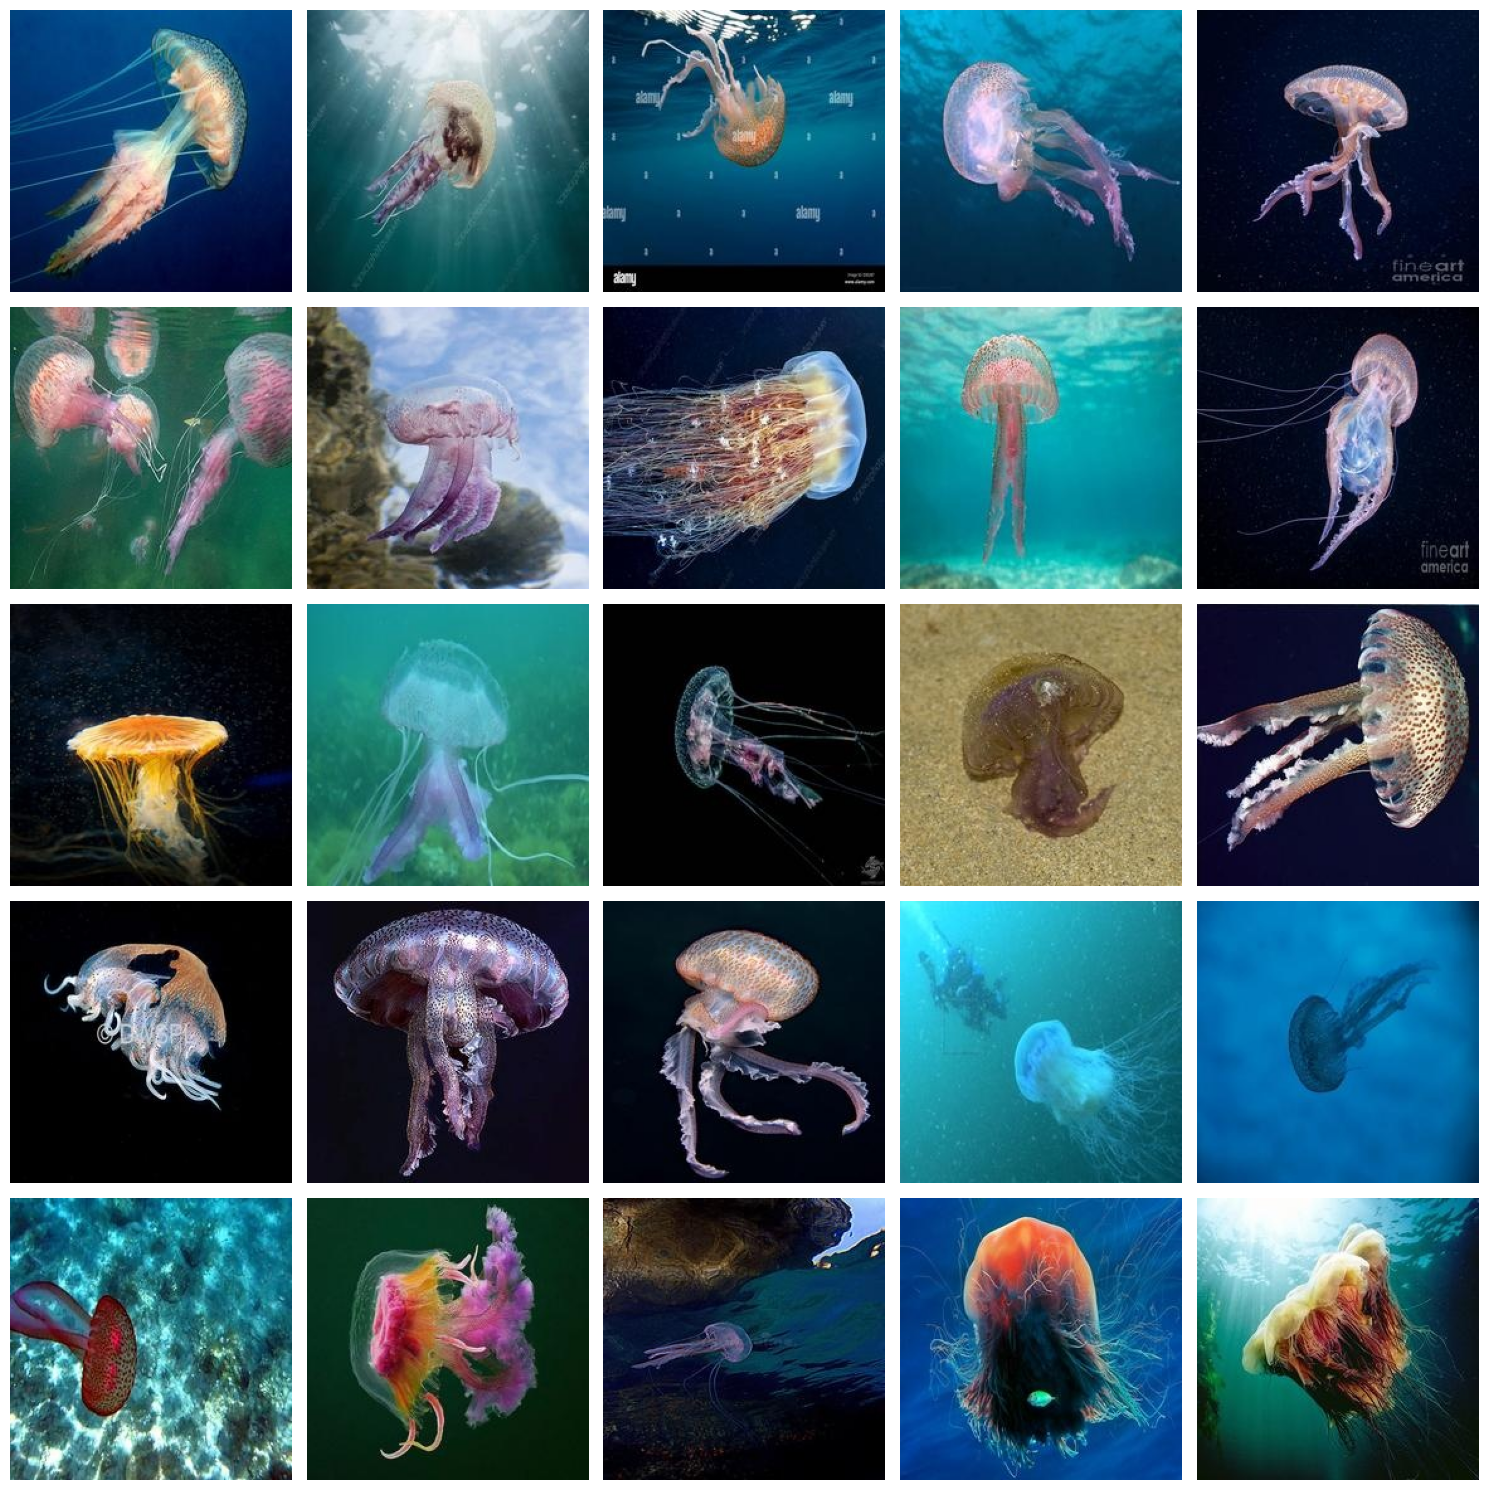

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

# data_path 경로 설정
data_path = "/content/drive/MyDrive/ColabNotebooks/ToyDatasets/jellyfish-dataset/Train_Test_Valid/all_images"

# data_path 하위의 모든 이미지 파일 경로 가져오기
image_paths = [os.path.join(data_path, filename) for filename in os.listdir(data_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]

# 그리드 크기 설정 (예: 5x5)
grid_size = (5, 5)

# 이미지 출력
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))  # 그리드 크기와 figure 크기 설정

for i, image_path in enumerate(image_paths):
    if i < grid_size[0] * grid_size[1]:  # 그리드 크기만큼만 이미지 출력
        row = i // grid_size[1]
        col = i % grid_size[1]
        img = mpimg.imread(image_path)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')  # 축 제거

plt.tight_layout()  # 이미지 간 간격 조정
plt.show()  # 그리드 출력


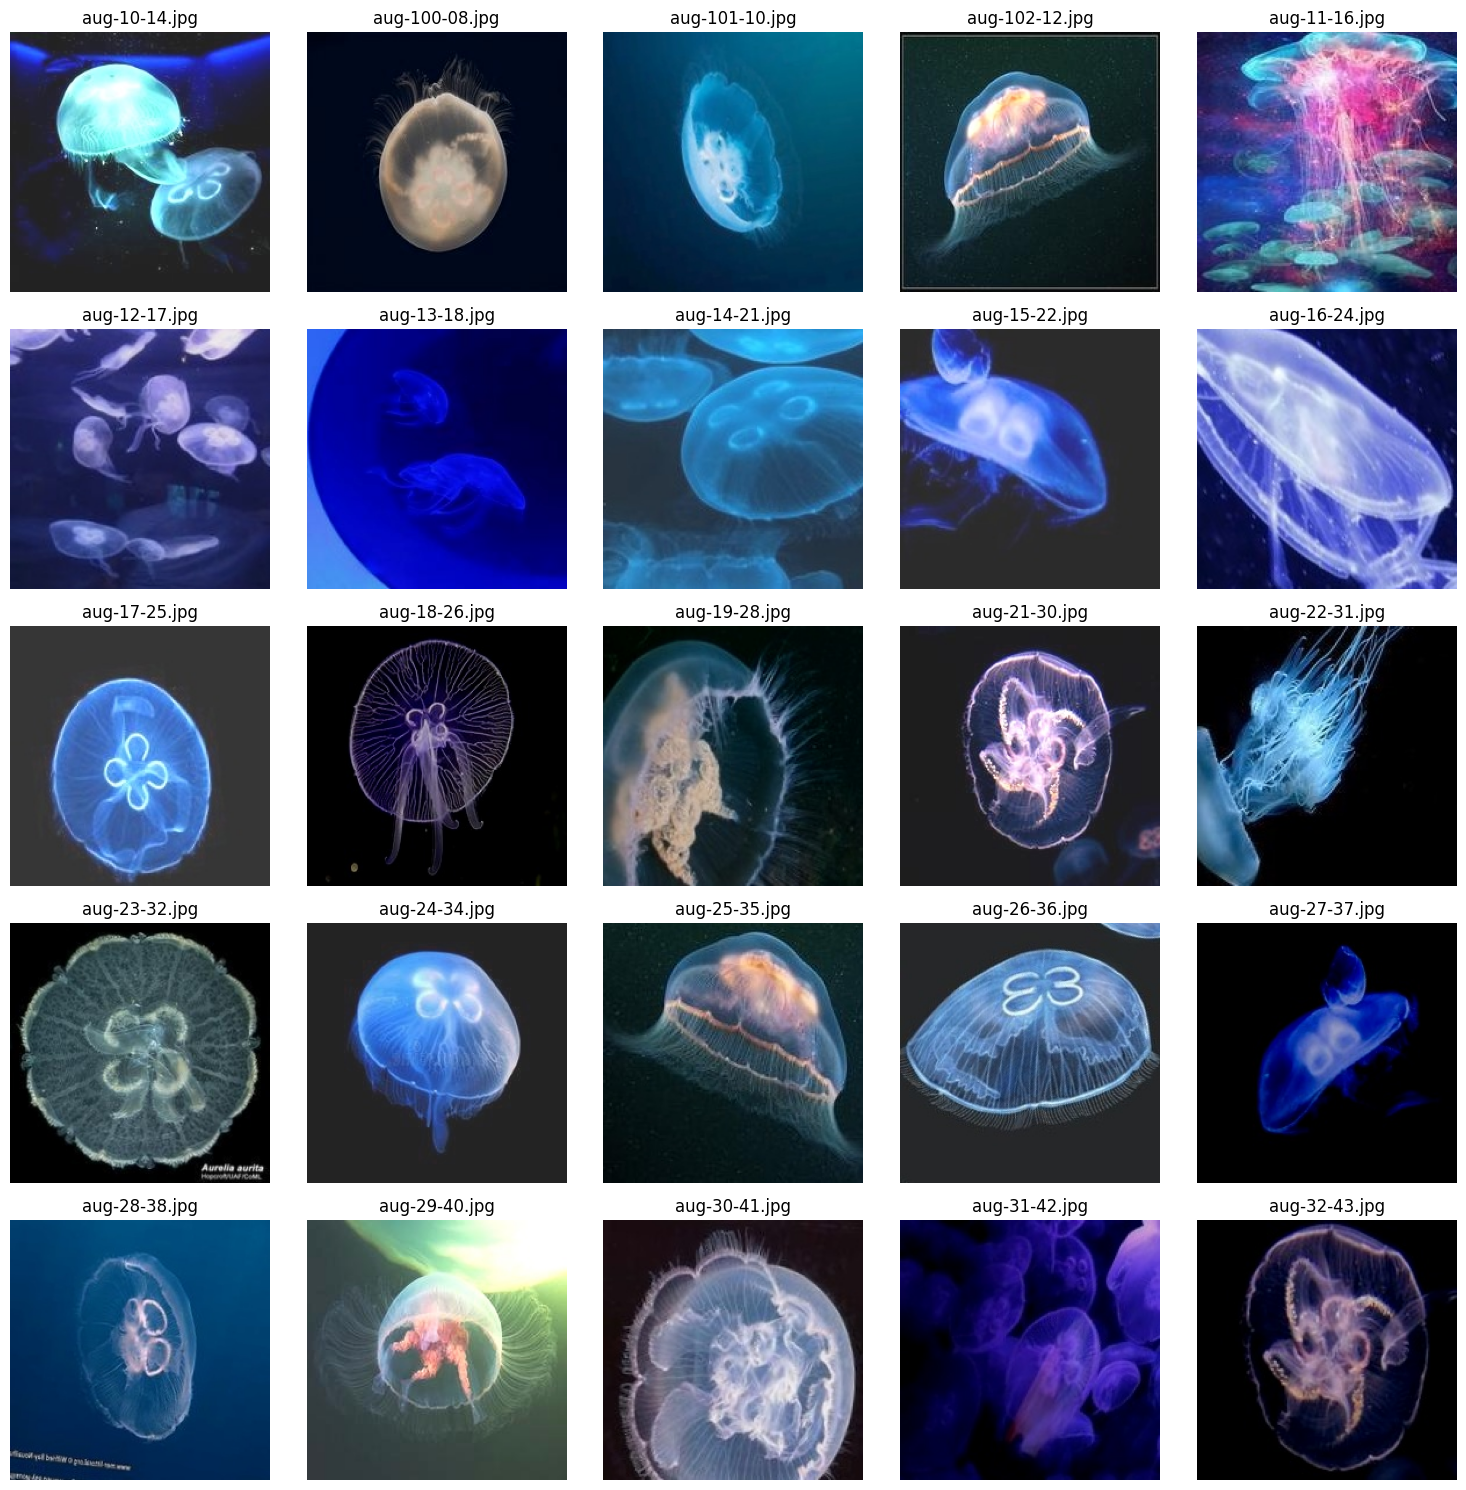

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

# data_path 경로 설정
data_path = "/content/drive/MyDrive/ColabNotebooks/ToyDatasets/jellyfish-dataset/Train_Test_Valid/all_images"

# data_path 하위의 모든 이미지 파일 경로 가져오기
image_paths = [os.path.join(data_path, filename) for filename in os.listdir(data_path) if filename.endswith(('.jpg', '.png', '.jpeg'))]

# 레이블 생성 (파일 이름에서 추출)
labels = [os.path.basename(image_path).split('_')[0] for image_path in image_paths]  # '_'로 나누어 첫 번째 부분을 레이블로 사용

# 그리드 크기 설정 (예: 5x5)
grid_size = (5, 5)

# 이미지 출력
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))  # 그리드 크기와 figure 크기 설정

for i, image_path in enumerate(image_paths):
    if i < grid_size[0] * grid_size[1]:  # 그리드 크기만큼만 이미지 출력
        row = i // grid_size[1]
        col = i % grid_size[1]
        img = mpimg.imread(image_path)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')  # 축 제거
        axes[row, col].set_title(labels[i])  # 레이블 추가

plt.tight_layout()  # 이미지 간 간격 조정
plt.show()  # 그리드 출력

In [9]:
##a.데이터 전처리_ 이미지 크기 조정
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 예시: 이미지 크기 조정
resized_images = [img_to_array(load_img(image_path, target_size=(150, 150))) for image_path in image_paths]

In [11]:
##b.데이터셋 분할_ 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(resized_images, labels, test_size=0.2, random_state=42)

In [12]:
##c.데이터 증강 설정: 데이터를 증강시켜 모델의 일반화 능력 높이기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
#모델정의
import tensorflow as tf  # TensorFlow 모듈 임포트
from tensorflow.keras.applications import VGG16  # VGG16 모델 임포트

# VGG16 모델 로드 (최상위 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 모델 정의
model = tf.keras.models.Sequential([
    base_model,  # 사전 훈련된 VGG16 모델 추가
    tf.keras.layers.Flatten(),  # 2D 배열을 1D 배열로 변환
    tf.keras.layers.Dense(512, activation='relu'),  # 은닉층 추가
    tf.keras.layers.Dense(6, activation='softmax')  # 출력층 (클래스 수에 따라 조정)
])

In [19]:
#모델컴파일
model.compile(optimizer='adam',  # Adam 옵티마이저 사용
              loss='categorical_crossentropy',  # 다중 클래스 분류를 위한 손실 함수
              metrics=['accuracy'])  # 정확도를 평가 지표로 사용

In [20]:
#데이터 준비
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강을 위한 제너레이터 설정
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 픽셀 값을 0~1로 정규화
    rotation_range=40,  # 랜덤 회전
    width_shift_range=0.2,  # 좌우 이동
    height_shift_range=0.2,  # 상하 이동
    shear_range=0.2,  # 전단 변환
    zoom_range=0.2,  # 줌
    horizontal_flip=True,  # 수평 반전
    fill_mode='nearest'  # 가장 가까운 픽셀로 채우기
)

# 검증 데이터 제너레이터
val_datagen = ImageDataGenerator(rescale=1./255)  # 검증 데이터도 정규화

In [21]:
#데이터 제너레이터 생성
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)  # 배치 사이즈 32
val_generator = val_datagen.flow(val_images, val_labels, batch_size=32)

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (150, 150, 3), y.shape = (445,)

In [22]:
print(f"훈련 이미지 수: {len(train_images)}")
print(f"훈련 레이블 수: {len(train_labels)}")

훈련 이미지 수: 445
훈련 레이블 수: 445


In [23]:
print(f"훈련 이미지 형태: {train_images.shape}")  # (샘플 수, 높이, 너비, 채널)
print(f"훈련 레이블 형태: {train_labels.shape}")  # (샘플 수,)

AttributeError: 'list' object has no attribute 'shape'

In [25]:
import numpy as np

# 리스트를 NumPy 배열로 변환
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [26]:
print(f"훈련 이미지 형태: {train_images.shape}")  # (샘플 수, 높이, 너비, 채널)
print(f"훈련 레이블 형태: {train_labels.shape}")  # (샘플 수,)

훈련 이미지 형태: (445, 150, 150, 3)
훈련 레이블 형태: (445,)


In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# 예시 데이터 생성
num_samples = 445  # 샘플 수
train_images = np.random.rand(num_samples, 150, 150, 3).tolist()  # 랜덤 이미지 데이터 (리스트)
train_labels = np.random.randint(0, 6, num_samples).tolist()  # 0~5 사이의 정수 레이블 생성 (리스트)

# 리스트를 NumPy 배열로 변환
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# 레이블을 원-핫 인코딩으로 변환
train_labels = to_categorical(train_labels, num_classes=6)

# VGG16 모델 로드
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 모델 정의
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 데이터 증강을 위한 제너레이터 설정
train_datagen = ImageDataGenerator(rescale=1./255)

# 데이터 제너레이터 생성
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)

# 모델 훈련
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 373s 26s/step - accuracy: 0.1828 - loss: 2.5472
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 367s 26s/step - accuracy: 0.2045 - loss: 1.9183
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 377s 26s/step - accuracy: 0.1791 - loss: 1.9393
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 385s 26s/step - accuracy: 0.1859 - loss: 1.7891
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 380s 26s/step - accuracy: 0.1754 - loss: 1.7886
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 375s 27s/step - accuracy: 0.1656 - loss: 1.7849
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 366s 26s/step - accuracy: 0.1993 - loss: 1.7846
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 366s 26s/step - accuracy: 0.1826 - loss: 1.7820
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 363s 26s/step - accuracy: 0.1689 - loss: 1.7867
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 382s 26s/step - accuracy: 0.1600 - loss: 1.7857


In [28]:
#다양한 이미지 분류 모델-1.ResNet
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
#다양한 이미지 분류 모델-2. InceptionV3
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
#다양한 이미지 분류 모델-3. MobileNet
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

<ipython-input-30-1e6091a113e5>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
#다양한 이미지 분류 모델-4. DenseNet
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
#다양한 이미지 분류 모델-5. EfficientNet
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
num_val_samples = 100  # 검증 데이터 샘플 수

In [35]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# 검증 데이터 준비
num_val_samples = 100  # 검증 데이터 샘플 수
val_images = np.random.rand(num_val_samples, 150, 150, 3)  # 랜덤 검증 이미지 데이터
val_labels = np.random.randint(0, 6, num_val_samples)  # 랜덤 검증 레이블
val_labels = to_categorical(val_labels, num_classes=6)  # 원-핫 인코딩

# 검증 데이터 제너레이터
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow(val_images, val_labels, batch_size=32)

# 모델 평가
loss, accuracy = model.evaluate(val_generator)
print(f"검증 손실: {loss:.4f}, 검증 정확도: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.1977 - loss: 1.7916
검증 손실: 1.8005, 검증 정확도: 0.2000


In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,  # 검증 데이터 제공
    validation_steps=len(val_generator),
    epochs=10
)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 389s 28s/step - accuracy: 0.1999 - loss: 1.7869 - val_accuracy: 0.2000 - val_loss: 1.8021
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 456s 29s/step - accuracy: 0.2027 - loss: 1.7835 - val_accuracy: 0.2000 - val_loss: 1.8041
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 425s 28s/step - accuracy: 0.2012 - loss: 1.7768 - val_accuracy: 0.2000 - val_loss: 1.8054
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 384s 28s/step - accuracy: 0.1909 - loss: 1.7847 - val_accuracy: 0.2000 - val_loss: 1.8070
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 383s 27s/step - accuracy: 0.1850 - loss: 1.7757 - val_accuracy: 0.2000 - val_loss: 1.8090
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 445s 28s/step - accuracy: 0.1799 - loss: 1.7828 - val_accuracy: 0.2000 - val_loss: 1.8091
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 383s 28s/step - accuracy: 0.1988 - loss: 1.7797 - val_accuracy: 0.2000 - val_loss: 1.8095
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 442s 28s/step - accuracy: 0.1769 - loss: 1.7985 - val_accuracy: 0.

In [39]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


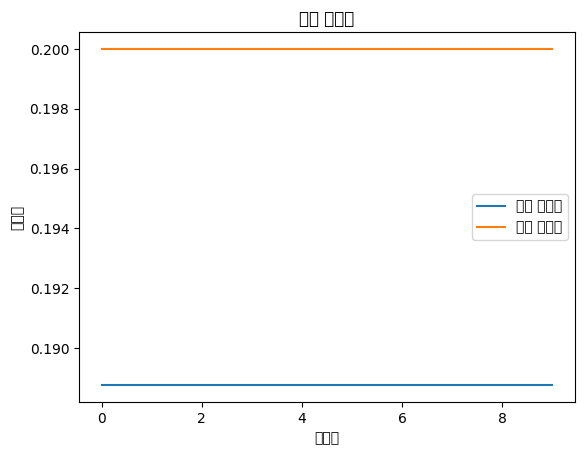

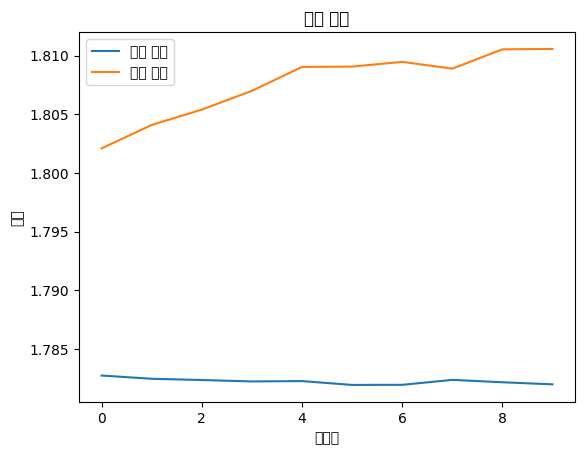

In [41]:
import matplotlib.pyplot as plt

# 학습 곡선 시각화
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('모델 정확도')
plt.ylabel('정확도')
plt.xlabel('에포크')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title("모델 손실")
plt.ylabel('손실')
plt.xlabel('에포크')
plt.legend()
plt.show()

In [42]:
model.save('my_model.h5')  # 모델 저장

In [43]:
model.save('my_model.keras')  # Keras 형식으로 모델 저장

In [52]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 출력

/content


In [53]:
import os
print(os.listdir('/content'))  # 현재 디렉토리의 파일 목록 출력

['.config', 'my_model.h5', 'my_model.keras', 'drive', 'sample_data']


In [54]:
from google.colab import files

uploaded = files.upload()  # 파일 선택 대화상자 열기

Saving 40.jpg to 40.jpg


In [55]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 이미지 경로 설정
img_path = '/content/40.jpg'  # 업로드한 이미지 파일 경로

# 이미지 로드 및 전처리
img = image.load_img(img_path, target_size=(150, 150))  # 모델에 맞는 크기로 조정
img_array = image.img_to_array(img) / 255.0  # 정규화
img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가

# 예측
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
print(f"예측된 클래스: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step
예측된 클래스: [3]
